In [1]:
import numpy as np #biblioteca utilizada para trabalhar com vetores
import pandas as pd #biblioteca para trabalhar com dataframes (planilhas excel)
import seaborn as sns #biblioteca utilizada para criar gráficos mais "bonitos"
import matplotlib.pyplot as plt #biblioteca para criar gráficos "comuns" ao estilo Matlab

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#função utilizada para realizar o upload do arquivo para a segmentação de cliente
#apenas para o google colab
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
# abrir o arquivo csv que contém os dados a serem utilizados durante a prática
customers = pd.read_csv('Mall_Customers.csv')


In [3]:
#visualizando as 5 primeiras linhas do banco de dados
customers.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40





*  **CustomerID** = Identificação única de um cliente
*  **Gender** = Gênero do cliente
*  **Age** = Idade do consumidor
* **Annual Income** = Renda anual do cliente
* **Spending Score** = 
Pontuação atribuída pelo shopping com base no comportamento do cliente e na natureza do gasto




In [4]:
#analisando o banco de dados
customers.describe() #função que retorna uma análise superficial dos dados 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


* **count** = número de elementos (linhas) existente no banco de dados
* **mean** = média dos valores na coluna
* **std** = desvio padrão dos dados presentes na coluna
* **min** = menor valor existente na coluna
* **25%** = primeiro quartil dos dados (25%)
* **50%** = segundo quartil dos dados (50%)
* **75%** = terceiro quartil dos dados (75%)
* **max** = valor máximo existente na coluna 

**Verificando se existem outliers (anomalias) nos dados. Para isso, será utilizado o boxplot.**

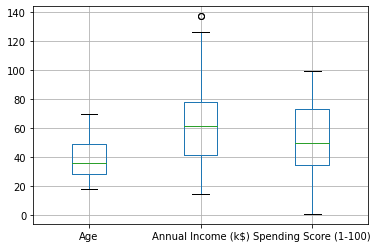

In [5]:
boxplot = customers.boxplot(column=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])  #constroi o boxplot para as colunas desejadas

**Explorando os dados. Entendendo alguns relacionamentos e comportamentos dos clientes.**

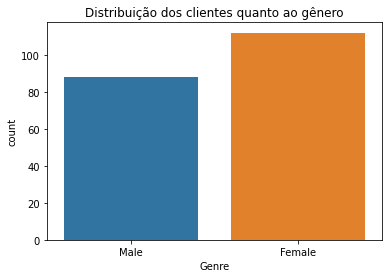

In [7]:
#analisando a distribuição dos clientes por gênero
sns.countplot(x='Genre', data=customers); # cria o gráfico que conta a quantidade de consumidores existente em cada um dos gêneros
plt.title('Distribuição dos clientes quanto ao gênero');  #adiciona o título no gráfico


**Distribuição dos consumidores pela idade**

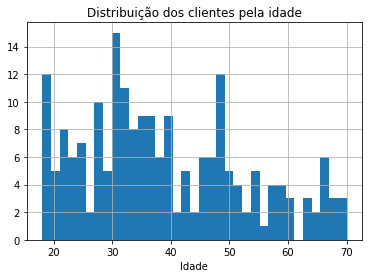

In [8]:
#analisando a distribuição dos clientes quanto a idade através do histograma
customers.hist('Age', bins=35);  #seleciona a coluna idade para realizar o histograma
                                 # os "bins" indicam a quantidade de grupos que se deseja dividir os dados
plt.title('Distribuição dos clientes pela idade');# adiciona o título ao gráfico (histograma)
plt.xlabel('Idade'); #adiciona o label para o eixo X


**Comparando a idade dos cosumidores pelo sexo.**

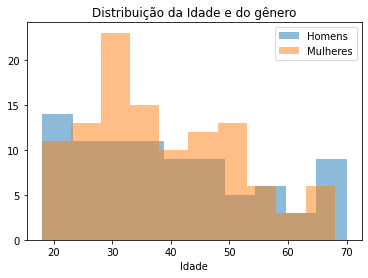

In [9]:
homens=customers[customers['Genre'] == 'Male'] #seleciona apenas os homens do banco de dados
mulheres= customers[customers['Genre'] == 'Female'] #seleciona apenas as mulheres no banco de dados
plt.hist('Age', data=homens, alpha=0.5, label='Homens'); #cria o histograma apenas da idade dos homens
plt.hist('Age', data=mulheres, alpha=0.5, label='Mulheres'); #cria o histograma apenas para a idade das mulheres
plt.title('Distribuição da Idade e do gênero'); #adicionao título ao gráfico
plt.xlabel('Idade'); # adiciona o label para o eixo x
plt.legend(); #adiciona a legenda

**Analisando os salários anuais recebidos pelos clientes.**

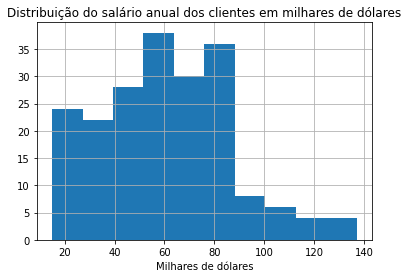

In [10]:
customers.hist('Annual Income (k$)');  #criando um histograma para os salários anuais recebidos pelos consumidores
plt.title('Distribuição do salário anual dos clientes em milhares de dólares'); #adiciona o título no gráfico
plt.xlabel('Milhares de dólares'); # adiciona o label do eixo X

**Analisando o impacto do gênero no salário anual dos clientes.**

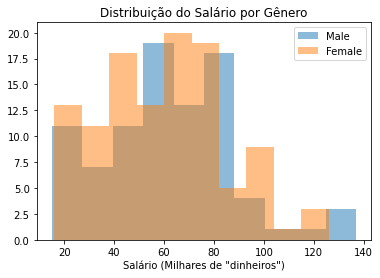

In [14]:
homens=customers[customers['Genre'] == 'Male']
mulheres=customers[customers['Genre'] == 'Female']
plt.hist('Annual Income (k$)', data=homens, alpha=0.5, label='Male');
plt.hist('Annual Income (k$)', data=mulheres, alpha=0.5, label='Female');
plt.title('Distribuição do Salário por Gênero');
plt.xlabel('Salário (Milhares de "dinheiros")');
plt.legend();

**Comparando as notas atribuídas aos consumidores.**

In [15]:
# cria o banco de dados apenas para os consumidadores masculinos e femininos
male_customers = customers[customers['Genre'] == 'Male'] #obtém apenas os consumidores homens
female_customers = customers[customers['Genre'] == 'Female'] #obtém apenas as consumidoras mulheres

# obtém os valores médios atribuídos a cada um dos sexos
print('Nota média atribuída aos homens: ',male_customers['Spending Score (1-100)'].mean()) #imprime o valor médio para os homens
print('Nota média atribuída às mulheres: ',female_customers['Spending Score (1-100)'].mean()) #imprime o valor média para as mulheres


Nota média atribuída aos homens:  48.51136363636363
Nota média atribuída às mulheres:  51.526785714285715


**Encontrando o salário em função da idade.**

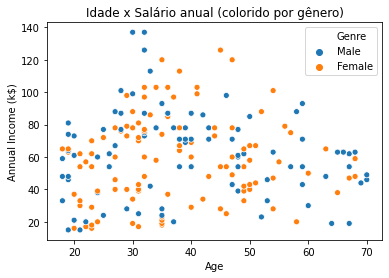

In [16]:
sns.scatterplot('Age', 'Annual Income (k$)', hue='Genre', data=customers); #realiza o plot do gráfico de distribuição do salário anual em função da idade
plt.title('Idade x Salário anual (colorido por gênero)'); #adiciona o título ao gráfico

**Analisando a correlação.**

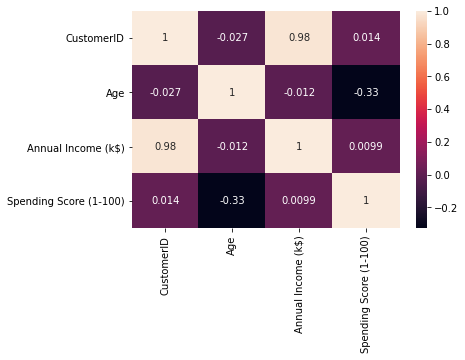

In [17]:
sns.heatmap(customers.corr(), annot=True) # desenha a matriz de correlação entre cada um dos dados 

**Analisando a correlação entre a nota atribuída ao cliente e a idade.**

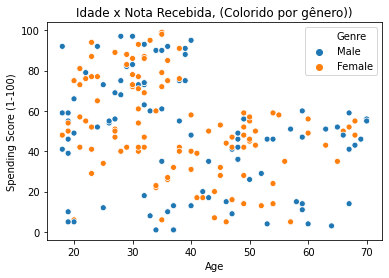

In [18]:
sns.scatterplot('Age', 'Spending Score (1-100)', hue='Genre', data=customers);  #realiza o plot do gráfico de dispersão 
plt.title('Idade x Nota Recebida, (Colorido por gênero))'); #adiciona o título ao gráfico

**Analisando a correlação por gênero.**

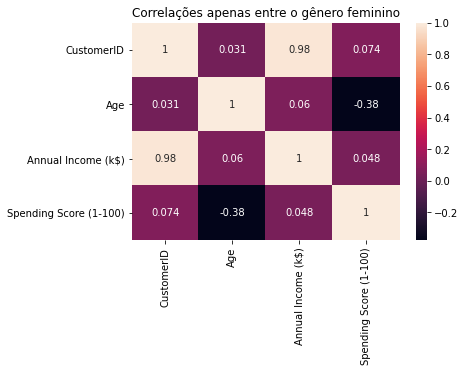

In [19]:
sns.heatmap(mulheres.corr(), annot=True); #encontra a matriz de correlação apenas entre o gênero feminino
plt.title('Correlações apenas entre o gênero feminino'); #adiciona o título no gráfico

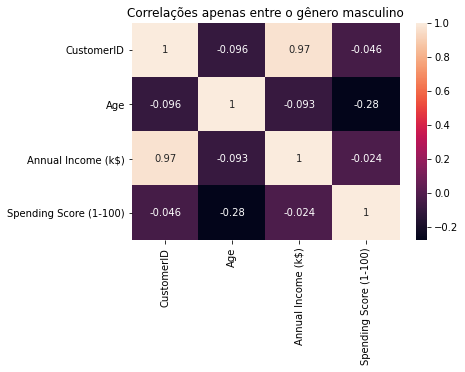

In [20]:
sns.heatmap(homens.corr(), annot=True); #encontra a matriz de correlação apenas entre o gênero masculino
plt.title('Correlações apenas entre o gênero masculino'); #adiciona o título no gráfico

**Analisando a correlação e tendência entre a idade e a nota atribuída apenas para as consumidoras.**

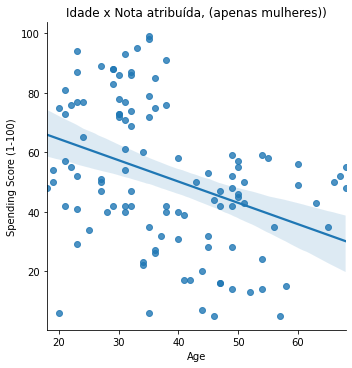

In [21]:
sns.lmplot('Age', 'Spending Score (1-100)', data=mulheres); #encontra o gráfico de dispersão e a tendência nos dados
plt.title('Idade x Nota atribuída, (apenas mulheres))'); # adiciona o título no gráfico

**Analisando a relação entre salário anual e a nota atribuída aos clientes.**

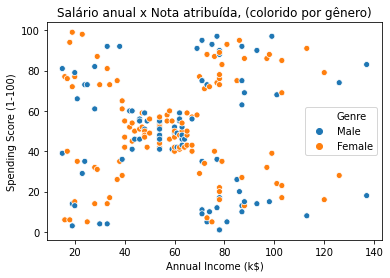

In [23]:
sns.scatterplot('Annual Income (k$)', 'Spending Score (1-100)', hue='Genre', data=customers); # constrói o gráfico de dispersão entre os dados
plt.title('Salário anual x Nota atribuída, (colorido por gênero)'); # adiciona o título ao gráfico

**Segmentação de clientes utilizando a Idade e as Notas Atribuídas.**

In [24]:
#biblioteca para realizar a construção do algoritmo não supervisionado K-means
from sklearn.cluster import KMeans


In [25]:
#obtém os dados para a construção do banco de dados apenas com a Idade e as Notas
segmentacao_1 = customers[['Age' , 'Spending Score (1-100)']].iloc[: , :].values #transforma os dados em array


In [26]:
kmeans = KMeans(n_clusters=4) #contrói o modelo para aplicar o algoritmo de clusterização não supervisionado K-means
kmeans.fit(segmentacao_1) #aplica o modelo K-means aos dados
y_kmeans = kmeans.predict(segmentacao_1) #encontra os grupos

In [27]:
#inicia a construção da figura
plt.figure(1 , figsize = (15 , 7) ) #define o tamanho da figura
plt.clf()


<Figure size 1080x504 with 0 Axes>

Text(0.5, 1.0, 'Segmentação de clientes pela Idade x Notas')

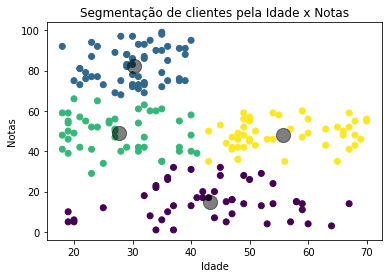

In [28]:
plt.scatter(segmentacao_1[:, 0], segmentacao_1[:, 1], c=y_kmeans, cmap='viridis') #constrói o gráfco de dispersão com os grupos
centers = kmeans.cluster_centers_ #encontra os centros de cada um dos grupos
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) #realiza o plot de cada um dos grupos
plt.xlabel("Idade")  #adiciona o label para o eixo X
plt.ylabel("Notas") #adiciona o label para o eixo Y
plt.title("Segmentação de clientes pela Idade x Notas") #adiciona o título

**Segmentação de clientes Salário Anual x Notas.**

In [29]:
#obtém os dados para a construção do banco de dados apenas com o salário anual x notas
segmentacao_2 = customers[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values #transforma os dados em array


In [30]:
kmeans = KMeans(n_clusters=5) #contrói o modelo para aplicar o algoritmo de clusterização não supervisionado K-means com 5 núcelos
kmeans.fit(segmentacao_2) #aplica o modelo K-means aos dados
y_kmeans = kmeans.predict(segmentacao_2) #encontra os grupos

Text(0.5, 1.0, 'Segmentação de clientes pela Salário x Notas')

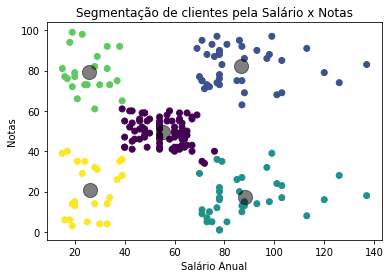

In [31]:
plt.scatter(segmentacao_2[:, 0], segmentacao_2[:, 1], c=y_kmeans, cmap='viridis') #constrói o gráfco de dispersão com os grupos
centers = kmeans.cluster_centers_ #encontra os centros de cada um dos grupos
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) #realiza o plot de cada um dos grupos
plt.xlabel("Salário Anual") #label para o eixo X
plt.ylabel("Notas") #label para o eixo Y
plt.title("Segmentação de clientes pela Salário x Notas") #adiciona o titulo

**Segmentação de clientes Idade X Salário Anual.**

In [32]:
#obtém os dados para a construção do banco de dados apenas com o salário anual x notas
segmentacao_3 = customers[['Annual Income (k$)' , 'Age']].iloc[: , :].values #transforma os dados em array


In [33]:
kmeans = KMeans(n_clusters=4) #contrói o modelo para aplicar o algoritmo de clusterização não supervisionado K-means com 5 núcelos
kmeans.fit(segmentacao_3) #aplica o modelo K-means aos dados
y_kmeans = kmeans.predict(segmentacao_3) #encontra os grupos

Text(0.5, 1.0, 'Segmentação de clientes pela Idade x Salário')

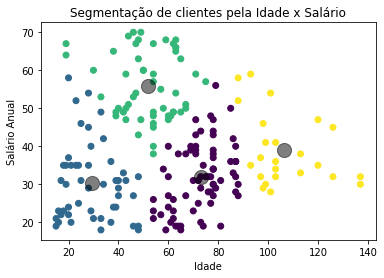

In [34]:
plt.scatter(segmentacao_3[:, 0], segmentacao_3[:, 1], c=y_kmeans, cmap='viridis') #constrói o gráfco de dispersão com os grupos
centers = kmeans.cluster_centers_ #encontra os centros de cada um dos grupos
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5) #realiza o plot de cada um dos grupos
plt.xlabel("Idade") #label para o eixo X
plt.ylabel("Salário Anual") #label para o eixo Y
plt.title("Segmentação de clientes pela Idade x Salário") #adiciona o titulo